# Deep Learning Intro Exercise

In this exercise you'll learn the basics of deep learning and the power of using its methods.
The exercise contains four parts:
1. Introducing a problem from the field of prognostic health monitoring (PHM) by vibration signals
2. Solving the problem using classic machine learning (ML)
3. Solving the problem using deep learning
4. Optimizing the results

*Created by Or Zamir*
<br>*Inspected and directed by Omri Matania*

In [1]:
from IPython.core.display import HTML
import modules.css_settings as css
HTML(css.get_settings())
print("Setting HTML styling was successful.")

In [2]:
## Imports
import modules.sample_generator as generator
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import backend
from keras import callbacks
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from scipy.stats import kurtosis
import tensorflow as tf
import seaborn

## Fetching Dataset
x_train, y_train = generator.get_dataset()
sample_size = 1024

print("Importing libraries and dataset was successful.")

Importing libraries and dataset was successful.


## Part 1
I this part we will introduce the problem and create the data samples.

### Part 1.1 - Introducing the Problem
You are a very talented engineer in a company that designs and manufactures prognostic health monitoring (PHM) products.
In short, those products monitor the vibration of mechanical systems in order to sense a fault of their mechanical parts.
The product you are working on is trying to sense a fault in tooth-wheel systems, as illustrated in **figure 1**.

<figure>
  <img src="img/tooth_wheel.png" alt="bla" width=300 height=300>
  <figcaption><b>Figure 1</b> - Two tooth-wheel machine.</figcaption>
</figure>

When the system has no flaws and the tooth-wheels have no faults, the sensor senses a pulsed signal, with a number of pulses as the number of the teeth.

A system fault can be a hole in one of the teeth, as illustrated in **figure 2**.

<figure>
  <img src="img/tooth_defect.png" alt="bla" width=300 height=300>
  <figcaption><b>Figure 2</b> - Two tooth-wheel machine with a fault.</figcaption>
</figure>

This type of fault is called `full tooth face fault`.

For the purpose of this exercise, the fault is modeled by an *additional pulse* in the sensor's output, with *width and height proportional to the fault's* width and depth (let's assume they are correlated, so the width and height of the pulse are proportional to each other).

`The code segment below generates a signal sensed by the sensor.
Play with the 3 parameters (number of teeth, fault size and noise size) to see how it affects the signal.`

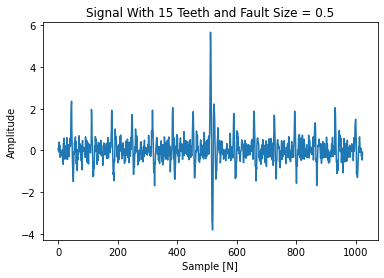

In [3]:
# Set Signal's Parameters
number_of_teeth = 15         # Number of teeth of the tooth-wheel, a reasonable range is 5 to 35.
fault_size = 0.5            # fault size, ranges from 0 to 1. Other values will return an error.
noise_size = 0.3             # The size of the noise, a reasonable range is 0 to 0.5.

# Generate signal
signal = generator.generate(number_of_teeth, fault_size, noise_size)

# Plot
plt.plot(signal)
plt.title("Signal With " + str(number_of_teeth) + " Teeth and Fault Size = " + str(fault_size))
plt.xlabel("Sample [N]")
plt.ylabel("Amplitude")
plt.show()

### Part 1.2 - Defining the Goal
Now we will define the goal of our learning machine.
The sensor, as mentioned, provides data about the fault in the form of an additional pulse to the signal, proportional to the fault size.

```Our goal is to estimate the fault size based on the sensor's measurements.```

Our data contains M training samples, when **$x_{train}^{m}$** is the output signal of the sensor and **$y_{train}^{m}$** is the real fault size of the signal.

In `machine learning` problems, usually two sets of data are provided - train set and test set. The train set is used to train the learning algorithm, and it's the input of the algorithm. Once the algorithm provides us a solution, the test set is used to test how accurately the algorithm predicts unseen data. For this kind of problems, the train set is usually split into 2 subsets - train and validation. The validation set acts as a regulator to the learning algorithm, as we'll observe later. Illustration of the three data sets is illustrated in **figure 3**.

<figure>
  <img src="img/test_train_validation.png" alt="bla" width=350 height=350>
  <figcaption><b>Figure 3</b> - Test, train and validation sets illustrated.</figcaption>
</figure>


## Part 2 - Classic Machine Learning Solution

Let's solve this problem with a classic ML approach, using `K-nearest-neighbors` (KNN) algorithm.
This algorithm works as follows:
1. Define `features` which are correlated with the `fault size`.
2. Pre-process the data by extracting its `features` and use it as the algorithm's input.
3. Find the K nearest neighbors of $x_{train}^{m}$ samples to your $x_{test}$ input, based on the `features`.
4. Calculate the average over the K $y_{train}^{m}$ samples of the nearest  K $x_{train}^{m}$
5. The average over $y_{train}^{m}$ samples should estimate the `fault size`.

*Note: the K parameter of KNN we should be set by using regulation. This topic will be reviewed in the deep learning section. For the purpose of this exercise we'll use K=10.*

The KNN algorithm is illustrated in **Figure 3**. The illustration shows three clusters of samples, while each color represents a different classification target. The colored samples are the training set, and the black sample is a new sample we're trying to predict its classification. The classification of the new sample is determined by the nearest four neighbors (K=4). In this example, most of the neighbors have blue classification, so this sample will be classified blue.

<figure>
  <img src="img/knn.png" alt="bla" style="width: 50%">
  <figcaption><b>Figure 3</b> - KNN illustration with three classification targets.</figcaption>
</figure>


### Part 2.1 - Defining Features
The first step is to define the features. In order to achieve good enough results, we'll use several features - lets say four.
<br>By looking at the signal and playing with the parameters, we can suggest several features that may be correlated with the `fault size`:
1. Signal's `Root Mean Square` (`RMS`)
2. Signal's `max value`
3. Signal's `kurtosis`
4. Signal's `Standard Deviation` (`STD`)

```Of course, there are more properties that can be correlated with the fault size - try to think of additional features.```


### Part 2.2 - Testing the Features
The next step is testing the selected `features` in order to proof that they are indeed correlated with `fault size`.

```In the next code segment, complete the implementations of the features and run the program, if the feature correlate with fault size, you'll observe a visual correlation between each feature and the fault size.```

Testing Max Value feature...


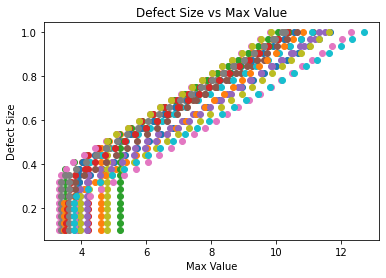

Testing RMS feature...


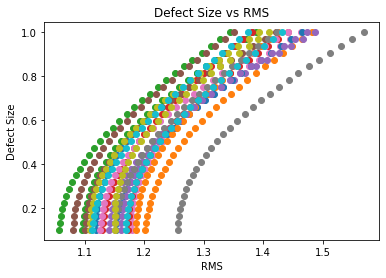

Testing Kurtosis feature...


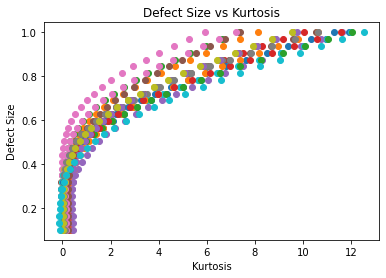

Testing STD feature...


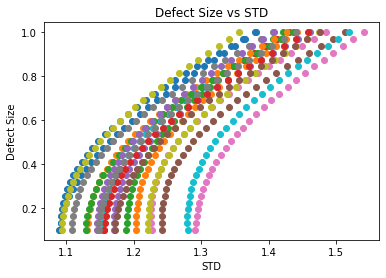

In [4]:
# Calculating Max value of a signal
def signal_max(x):
    # Complete implementation here:
    max_val = np.nanmax(np.array(x))
    return max_val

# Calculating RMS of a signal
def signal_rms(x):
    # Complete implementation here:
    rms = np.sqrt(np.nanmean(np.array(x) ** 2))
    return rms

# Calculating kurtosis of a signal 
def signal_kurt(x):
    # Complete implementation here:
    kurt = kurtosis(x)
    return kurt

# Calculating SDT of a signal
def signal_std(x):
    # Complete implementation here:
    std = np.nanstd(x)
    return std

## Create feature functinos array - if you add any function, add it to this array
features_calc = [signal_max,
                 signal_rms,
                 signal_kurt,
                 signal_std]

## Testing features
# Change the feature_func and the feature_name according to the feature you wish to test.
generator.test_feature(feature_func=signal_max, feature_name='Max Value')
generator.test_feature(feature_func=signal_rms, feature_name='RMS')
generator.test_feature(feature_func=signal_kurt, feature_name='Kurtosis')
generator.test_feature(feature_func=signal_std, feature_name='STD')

### Part 2.3 - Pre-processing the Data
In the previous parts we defined and tested our `features`.

Now we'll pre-process the data into a feature matrix that represents our samples.
First we split the training dataset into 2 subsets - train and test. Then we calculate the feature matrix that represents our input data.

#### Splitting the Dataset
In this case we have only a train set, so we will splits it into two sets - train and test. In this part we won't use regulation (this process is used to optimize the K parameter), so we won't create a validation set.

#### Normilizaing Features 
As you may have noticed, every feature ranges at a different range (watch the x-axis of the plots above). Assuming no feature is a better predictor than other, we want all features to have an even weight in the learning process. The way to achieve it is by normalizing the features. Normalizing is performed by subtracting each feature by its mean value, and then dividing by its standard deviation, as follows:

<font size="3">$$normilized\_feature_m^i = \frac{feature_m^i - E[feature_m]}{\sigma[feature_m]}$$</font>
<br><center><b>Equation 1</b> -  Normalization of feature element $feature_m^i$ of feature vector $feature_m$ </center>

The normalization process should be applied on both the train set and the test set.

In [5]:
# Split train set into 2 subsets
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(x_train, y_train, test_size=0.3)

# Variable initialization
feature_num = np.size(features_calc)
dataset_size = generator.get_set_size()
train_size = np.size(y_train_knn)
test_size = np.size(y_test_knn)
train_features = np.zeros([train_size, feature_num])
test_features = np.zeros([test_size, feature_num])

# Creating a feature matrix for train set. Its dimentions are (train_size)x(feature_num)
for m in np.arange(train_size):
    for f in np.arange(feature_num):
        train_features[m][f] = features_calc[f](x_train_knn[m][:])

# Creating a feature matrix for test set. Its dimentions are (train_size)x(feature_num)
for m in np.arange(test_size):
    for f in np.arange(feature_num):
        test_features[m][f] = features_calc[f](x_test_knn[m][:])
    
# Normalizing features
for f in np.arange(feature_num):
    test_features[:][f] = (test_features[:][f] - np.nanmean(train_features[:][f])) / np.nanstd(train_features[:][f])
    train_features[:][f] = (train_features[:][f] - np.nanmean(train_features[:][f])) / np.nanstd(train_features[:][f])

### Part 2.4 - Estimation using KNN
In this part we'll try to predict a fault size using KNN. After pre-processing, we no longer care about how the `signal` looks like, we only care about its extracted `features`.
<br>Now, let's construct the `KNN` predictor using `sklearn` library.

```In order to implement a regression predictor, use the `KNeighborsRegressor` class from this library.```

Few settings for this algorithm:
1. `n_neighbors` - number of neighbors used for averaging
2. `train_features` - the extracted features
3. `y_train` - the known fault sizes

<br>*Note: In the solution we managed to achieve test loss = 3.56e-4 for K=10*

In [6]:
# Calculating KNN, use K = 10
knn_predictor = knn(n_neighbors=10)
knn_predictor.fit(train_features, y_train_knn)

# Calc MAE
mae = mean_absolute_error(knn_predictor.predict(test_features), y_test_knn)
print("MAE error: " + "{:.2e}".format(mae))

MAE error: 4.09e-04



## Part 3 - Deep Learning Solution

<br>In the previous parts we solved the problem using `ML`. This method suffers from several problems:
1. The engineer must understand the data and have enough experience to define and extract `features` correctly.
2. There are many problems that people solve easily (such as recognizing an animal in a picture), but find it very hard to define the `features` for these problems (what are the features of an animal in a picture?). The task of definig good features is sometimes beyond human capabilities. This is the main reason that `ML` approach is very limited for many `AI` applications.
3. The `features` defined might be good enough for describing the input, but may be less suitable for a specific `ML` algorithm.

the engineers must extract `features` from the dataset in order to train the algorithm. This task can be difficult as you experienced just now, and sometime it's beyond human capabilities.

In this part we will solve this problem using a `deep learning` approach.
<br> The `deep learning` approach tries to learn the `features` by itself, which makes it a very powerful tool.

### Part 3.1 - Deep Learning Introduction and `Keras` Library
This solution assumes basic knowledge of deep learning principles. I highly recommend the three-chapter YouTube series made by 3Blue1Brown as a source of learning those basic principles:
<br>[Chapter 1 - Neuron Network](https://www.youtube.com/watch?v=aircAruvnKk&t=462s&ab_channel=3Blue1Brown)
<br>[Chapter 2 - Learning with Gradient Descent](https://www.youtube.com/watch?v=IHZwWFHWa-w&ab_channel=3Blue1Brown)
<br>[Chapter 3 - Backpropagation](https://www.youtube.com/watch?v=Ilg3gGewQ5U&t=1s&ab_channel=3Blue1Brown)

For this part we'll use the `keras` library. For further information about this library, please refer to its documentation site.


`Lets define the three building blocks of deep learning:`
1. **Architecture** - defining the structure of the deep learning network
2. **Optimization** - defining the learning algorithm of the deep learning network, aka minimizing the loSs function.
3. **Regulation** - defning the the methods we apply in order to avoid overfitting.

Each of the following parts will focus on each of the building blocks, along with the solution for the presented problem.

### Part 3.2 - Architecture
The deep learning architecture represents our prior knowledge of the problem, called `bias`. The Architecture is defined by its `layers number`, `layers size`, `layers type` and the `activation` function of each layer. We'll construct a 3-layer architecture as illustrated in **figure 4**.

<figure>
  <img src="img/architecture.png" alt="bla" style="width: 50%">
  <figcaption><b>Figure 4</b> - Illustration of the 3-layer architecture for this exercise. <br>The properties of each layer (size, type and activation) are shown above each layer.</figcaption>
</figure>

##### Layers
We'll construct a simple architecture with 3 layers:
1. The first layer represents the `input layer` (sensor's output), and it has the size of the input (`sample_size`=1024). No activation is applied on the first layer, since it represents the data.
2. The second layer is a `hidden layer` and it has a size of 64 (arbitrary size). We will apply a `ReLu activation` for this layer.
3. The third layer represents the `output layer` (the fault size), and it's size is 1 (a scalar). We will apply a `sigmoid activation` for this layer.
*All layers but the input are of type `dense`, means they are fully connected to their preceding layer. The input layer has no preceding layer, so there's no point in defining its type.*

`Activation` functions maps the input of each node in the layer into a value of a specific range (commonly [0 to 1] or [-1 to 1]) that represents how `activated` the node is. As nodes represents feature elements, the `activation` of the node how strong the learning process recognizes this element in the data. **Figure 5** shows three common `activation` functions and their formulas, two of them are used in this exercise.

<figure>
  <img src="img/activations.png" alt="bla" style="width: 80%">
  <figcaption><b>Figure 5</b> - Three common activation functions. From left to right - sigmoid activation, tanh activation and rectified linear unit (ReLu) activation.</figcaption>
</figure>


##### Kernel initializers
Defines the initial distribution of the weight vector. We will set this setting to `normal` distribution.

`The following code segment implements our model's architecture. Any code line is preceded with a comment explaining the implementation.`

In [7]:
def create_model():
    # Creating a sequential model - a simple way to construct a model. For constructing more complex models 
    # with additional flexibility in design, one can use a Functional model.
    model = Sequential()

    # Adding the input layer with a dimension of the sample_size (1024)
    # The input layer doesnt have any more properties.
    model.add(keras.layers.InputLayer(input_shape=(sample_size,)))

    # Adding a hidden layer with a dimension of the 64 (an arbitrary value)
    # The type of layer is Dense, its activation is ReLu and it's weights initialized with normal distribution.
    model.add(Dense(64, kernel_initializer='normal', activation='relu', name='hidden_layer'))
    
    # Adding the output later with the dimension of the output (a scalar)
    # The type of layer is Dense, its activation is sigmoid and it's weights initialized with normal distribution.
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid', name='output_layer'))
    
    return model

Finally, lets construct the model and print its architecture using `model.summary()`.  
<br>*Note that the input layer doesnt appear in the model summery, it starts only from the second layer.*

In [8]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 64)                65600     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 65,665
Trainable params: 65,665
Non-trainable params: 0
_________________________________________________________________


### Part 3.3 - Optimization
The optimization defines the algorithm which solves the learning problem. It includes the `loss function` and the `optimizer`. 
<br>The `loss function` is the error which the algorithm aims to reduce to minimum. We'll set this parameter to `Mean Absolute Error`, or `MAE` in short. <br>The `optimizer` is the algorithm we use in order to minimize the `loss function`. For this type of problem, we'll use the numerical optimizer called `Stochastic Gradient Descent`, or `SGD` in short.

#### Mean Absolute Error
The `mean absolute error` is defined by following **Equation 2**:
<font size="3">$$MAE=\frac{\sum_{i=0}^{N-1}{|predicted_i-true_i|}}{N} $$</font>
<br><center><b>Equation 2</b> -  Mean absolute error.</center>

#### Stochastic Gradient Descent
`Gradient descent` is an iterative optimization algorithm for finding a local minimum of a differential function. In our case, we try to minimize the loss function (`MAE`), and the controlled variables are the weights that transforms the input into the output through the networks layers. The algorithm calculates the `gradient` of the function - a vector of partial derivatives for each variable. Then the algorithm calculated the new value of the function by subtracting the gradient from the previous value.
The descent rate is controlled by a design parameter $\alpha$ as can be seen in **Equation 3**. In `kears` library this design parameter is configured by the `learning_rate` parameter, as you'll experience later.


<font size="3">$$Loss_m = loss_{m-1}-\alpha ∇F(Loss_{m-1}) $$</font>
<br><center><b>Equation 3</b> -  Calculation of the $m$-step of the gradient descent algorithm for the loss output by subtracting the gradient of the previous output $loss_{m-1}$ from its value. The gradient is multiplied by a step_size parameter $\alpha$ before subtraction to control the rate and the accuracy of the descent.</center>

<br><br>
`Stochastic gradient descent` is a version of `gradient descent` that uses only a subset of the samples (called `mini-batch`) in order to calculate the gradient. The advantage is obvious - calculation of less samples *reduces runtime*. The tradeoff is that the descent is less accurate for each step, and therefore can yield worse results. The difference in the descent movement is illustrated in **Figure 6**. 

<figure>
  <img src="img/sgd.png" alt="bla" style="width: 80%">
  <figcaption><b>Figure 6</b> - Gradient descent loss for a 2-dimensional function. The left graph illustrates a normal descent towards the minimum, while the right graph illustrates a stochastic descent towards the minimum.</figcaption>
</figure>

##### Setting Fitting Process Parameters
Once we defined the `architecture` and the `optimization` parameters of our deep learning solution, we can finally perform a learning process, or `fitting`.
There are some parameters we'll new define in order to set our fitting process. The `epochs` defines how many iterations the learning process will perform. The `batch_size` defines the number of samples the algorithm will use in each iteration, and `learning_rate` defines the step size of the `SGD` optimizer. We'll set the first 2 parameters in the following parts, while changing the `learning_rate` only on later parts of this exercise.  


Now let's compile our model with the `optimization` parameters using `model.compile()`, and run the learning process using `model.fit()`. The result of the fitting process will be plotted in a `loss vs epochs` graph, showing the training error decreases as the learning process continues.

In our case, $x_{train}^m$ (sensor's output) is our input data and $y_{train}^m$ (real fault size) is the output. Number of `epochs` was set to 100, and `batch_size` to 64. Play with those parameters in order to notice their effect on the learning process.

*Note 1: In the solution we manage to achieve train loss = 4.9e-3 for 100 epochs*
<br>*Note 2: A single run should take about 1 minute*

Train Loss is: 5.46e-03


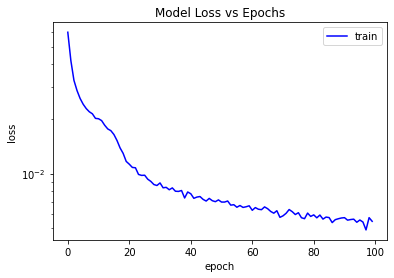

In [9]:
# Creating the model's architecture
model = create_model()

# Setting the optimization parameters -MAE loss function and SGD optimzier.
model.compile(loss='mean_absolute_error', optimizer='SGD')

# Setting learnig rate
learning_rate = 0.01     ## Play with this parameter
backend.set_value(model.optimizer.learning_rate, learning_rate)

# Running learning process
history = model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=0)

# Printing Results
print("Train Loss is: " + "{:.2e}".format(history.history['loss'][-1]))

# Plotting loss vs epochs
plt.semilogy(history.history['loss'], 'b')
plt.title("Model Loss vs Epochs")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

`Play with the learning rate parameter in the code segment above and see how it affects the results before processing to the next parts.`

### Part 3.4 - Regulation Using Early Stopping
As you may have noticed, as we increase the number of `epochs` the `training error` decreases. This result isn't surprising since adding more `epochs` causes the algorithm to learn better the given data. But - when should we stop the algorithm? The number of epochs defines how many learning epochs the algorithm will perform, but we set it kind of arbitrary. In reality we want the algorithm to run just enough time to get a good fitting, but avoiding wasteful runtime.

This problem is solved by `regulation`. Applying `regulation` means limiting the algorithm ability to learn the training data "too much" so it will be able to generalize well.

`Early Stopping` is a method for regulating the number of epochs and it has two purposes:
1. **Avoid overfitting** - by monitoring the `validation loss` and stopping the learning process at the point that the `validation loss` stops decreasing and starts increasing. At this point continuing the learning process will harm the learning.
2. **Avoid unnecessary runtime** - by monitoring `train loss` and stopping the learning process at the point that the `train loss` stops decreasing and reaches a plateau. At this point continuing the learning process will yield no improvement.

Using the dedicated `early stopping` tool provided by `keras` library, we can the number of epochs used by your learning algorithm. In `keras` sequential model, we set the `early stopping` using `callback`. `Callbacks` allow us to perfroms actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).
<br>Notice that there are several ways to set this tool. We'll set the fitting process to stop after 10 epochs with no improvement for the training loss.

`For this exercise, a reasonable number of epochs is around 120.`


Train Loss is: 6.10e-03
Number of epochs until stopping: 74


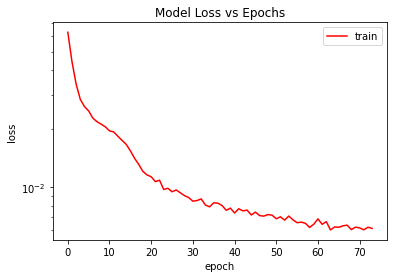

In [10]:
# Creating the model's architecture and setting the optimization parameters
model = create_model()
model.compile(loss='mean_absolute_error', optimizer='SGD')

# Set Early Stopping tool to stop after 10 epochs with no improvement.
callback = callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Running learning process
history = model.fit(x_train, y_train, epochs=200, batch_size=64, verbose=0, callbacks=[callback])

# Printing Results
print("Train Loss is: " + "{:.2e}".format(history.history['loss'][-1]))
print("Number of epochs until stopping: " + str(np.size(history.history['loss'])))

# Plotting loss vs epochs
plt.semilogy(history.history['loss'], 'r')
plt.title("Model Loss vs Epochs")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

### Part 3.5 - Change Learning Rate
An important parameter of SGD algorithm is the `learning_rate`, which represents the descent step size of the algorithm.
<br>At larger `learning_rate`, the movement is rougher and the chances to miss the local minimum increases, resulting in higher loss.
<br>At smaller `learning_rate`, the descent is slower and more epochs are needed to find time local minimum, resulting in slower learning. This effect is illustrated in **Figure 7**.

<figure>
  <img src="img/sgd_rate.jpg" alt="bla">
  <figcaption><b>Figure 7</b> - SGD for different learning rates. The left graph illustrates using a too small learning rate - resulting is slow advancement. The right graph illustrates using a too large learning rate, resulting is high error. The center graph illustrates using an appropriate learning rate, resulting in a reasonable runtime and error.</figcaption>
</figure>

<br>Play with `learning_rate` parameter of the SGD algorithm and notice its effect. Plot a graph of `Loss vs Epochs` that compares between several `learning_rate` settings.

<br>*Note 1: the default `learning_rate` is 0.01.*
<br>*Note 2: This run takes several minutes. In order to decrease calculation time we'll only part of the data.*
<br>*Note 3: For this part we split the `training set` to `training set` and `validation set` in order to see the affect of different learning rate on the validation set too. The split is achieved by using the `validation_split` parameter as an input for the model.fit() function. `validation_split=0.3` means that 30% of the *training set* will be used for *validation** 

Fitting at learning rate: 1.00e-01
	Train Loss is: 2.99e-02
	Validation Loss is: 1.28e-02

Fitting at learning rate: 5.00e-02
	Train Loss is: 1.64e-02
	Validation Loss is: 9.22e-03

Fitting at learning rate: 1.00e-02
	Train Loss is: 5.69e-03
	Validation Loss is: 4.23e-03

Fitting at learning rate: 1.00e-03
	Train Loss is: 5.53e-03
	Validation Loss is: 4.43e-03

Fitting at learning rate: 1.00e-04
	Train Loss is: 2.97e-03
	Validation Loss is: 3.05e-03

Fitting at learning rate: 1.00e-05
	Train Loss is: 8.61e-02
	Validation Loss is: 8.67e-02



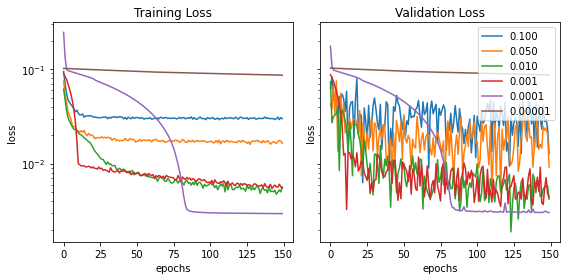

In [11]:
# Set plot figure
fig, ax = plt.subplots(1,2, figsize=(8, 4), sharey='all')

# Test some learning rates
for rate in [0.100, 0.050, 0.010, 0.001, 0.0001, 0.00001]:
    # Reconstructing the architecture of the model
    backend.clear_session()
    model = create_model()
    model.compile(loss='mean_absolute_error', optimizer='SGD')
    
    # Setting learning rate
    backend.set_value(model.optimizer.learning_rate, rate)
    print("Fitting at learning rate: " + "{:.2e}".format(rate))
    
    # Running learning process 
    history = model.fit(x_train, y_train, validation_split=0.3, epochs=150,
                            batch_size=64, verbose=0)
    
    print("\tTrain Loss is: " + "{:.2e}".format(history.history['loss'][-1]) + 
      "\n\tValidation Loss is: " + "{:.2e}".format(history.history['val_loss'][-1]) + "\n")
    # Plot results
    ax[0].semilogy(history.history['loss'])
    ax[1].semilogy(history.history['val_loss'])

ax[0].set_title("Training Loss")
ax[1].set_title("Validation Loss")
ax[0].set_ylabel('loss')
ax[1].set_ylabel('loss')
ax[0].set_xlabel('epochs')
ax[1].set_xlabel('epochs')
plt.legend(['0.100', '0.050', '0.010', '0.001', '0.0001', '0.00001'], loc='upper right')
plt.tight_layout()
plt.show()

A large `learning_rate` (0.1 or 0.05 in this example) prevents the algorithm from finding the minimum.
<br>As the `learning_rate` gets smaller, the process becomes slower. For `learning_rate` of 0.01 or 0.001 we observe a steep slope toward the minimum, and a more moderate slope for `learning_rate` of 1e-4. On the other side, we can observe that `learning_rate` of 1e-4 results in a smaller error.
<br>The `learning_rate` of 1e-5 is an extreme example of a too slow rate. In 150 epochs, as can be seen from the graph, the algorithm almost didn't minimize the loss function. 

As can be observer from the `validation loss` graph, it behaves the same as the `training loss`, so there's no overfit.

### Part 3.6 - Optimizing Results by Changing Learning Rates

Now try to optimize the results by reducing the `learning_rate` every time your result stops improving.
<br> The code below implements a learning process that changes its learning rate every after a certain number of epoch passes, or when `early stopping` stops the learning. The `learning_rates` array contains the learning rates that will be used in the learning process. 
<br>`Set this variable with the learning rates in a decreasing order, and try to achieve loss as small as possible`.

*Note: In the solution we manage to achieve train loss = 5.18e-4 and validation loss = 5.55e-4*

Fitting at learning rate: 1.00e-02
Fitting at learning rate: 1.00e-03
Fitting at learning rate: 1.00e-04
Fitting at learning rate: 1.00e-05
Train Loss is: 5.91e-04
Validation Loss is: 6.27e-04


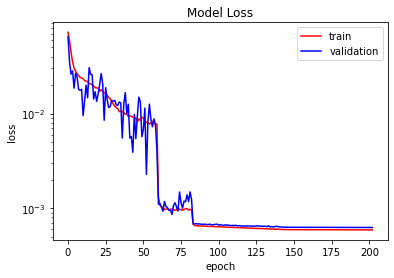

In [12]:
# Reconstructing the architecture of the model
backend.clear_session()
model = create_model()
model.compile(loss='mean_absolute_error', optimizer='SGD')

# Initializing looses variables
loss = []
val_loss = []

learning_rates = [0.01, 0.001, 0.0001, 0.00001] # Fill this array in a decreasing order of learning rates.
# Fitting with changing learning rates
for rate in learning_rates:
    
    # Setting learning rate
    backend.set_value(model.optimizer.learning_rate, rate)
    callback = callbacks.EarlyStopping(monitor='loss', patience=6)
    print("Fitting at learning rate: " + "{:.2e}".format(rate))
    
    # Running learning process
    history = model.fit(x_train, y_train, validation_split=0.3, epochs=60, batch_size=64,
                        verbose=0, callbacks=[callback])
    
    # Updating loss variables
    loss = np.concatenate([loss, history.history['loss']])
    val_loss = np.concatenate([val_loss, history.history['val_loss']])

# Print results
print("Train Loss is: " + "{:.2e}".format(loss[-1]) + 
      "\nValidation Loss is: " + "{:.2e}".format(val_loss[-1]))

# Plot results
plt.semilogy(loss, 'r')
plt.semilogy(val_loss, 'b')
plt.title("Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Decreasing the learning rate during learning process improves the solution. that's because when the algorithm approaches the local minimum, smaller steps are required to minimize the loss function (see **Figure 8**). Thats the reason decreasing learning rate helps us get better result. We start with a large learning rate in order to make the process faster, and decrease the rate as we get closer to the minimum.

<figure>
  <img src="img/learning_rate_change.png" alt="bla" style="width: 60%">
  <figcaption><b>Figure 8</b> - A approaching the local minimum, decreasing the learning rate should help us find a better minimum.</figcaption>
</figure>

## Summary
This exercise presents the basics of the `deep learning`. In the exercise we've been through:
1. The fundamental building blocks of `deep learning` are `architecture`, `optimization` and `regulation` (see **Figure 9**). We implemented those building blocks using `keras` library.
2. The benefits of using `deep learning` over `classic ML`. The main benefit is that the engineer doesn't have to understand the data well and doesn't need to define the features. The `deep learning` method extracts the feature itself and the engineer responsibility is to construct the architecture properly and sometimes pre-process the data. Additionally, it can be observed that runtime complexity can also be reduced using `deep learning`.
3. Finally, we performed a more advanced optimization by changing the learning rate during the learning process, and achieved even better results.

<figure>
  <img src="img/deep_learning_blocks.png" alt="bla" style="width: 60%">
  <figcaption><b>Figure 9</b> - The building blocks of deep learning.</figcaption>
</figure>